# Exploración de Datos - Chess Trainer

In [ ]:
# Generar dataset for testing purposes

%python /app/src/scripts/generate_full_report.py --input /app/data/.pgn --output training_dataset.csv --analyze


In [ ]:
# Cargar dataset generado previamente
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('training_dataset.csv')
df.head()

In [1]:
# Importar módulos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from math import log2
from sklearn.preprocessing import PowerTransformer, LabelEncoder, MinMaxScaler, StandardScaler
from scipy import stats
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Ejemplo simple
data = pd.Series([10, 12, 13, 14, 15, 16, 17, 100])  # 100 es un outlier
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data < lower_bound) | (data > upper_bound)]
print("Outliers detectados:", outliers.tolist())

Outliers detectados: [100]


In [6]:
data = np.array([10, 12, 13, 14, 15, 16, 17, 100])
z_scores = stats.zscore(data)
outliers = data[np.abs(z_scores) > 3]
print("Outliers detectados con Z-score:", outliers.tolist())

Outliers detectados con Z-score: []


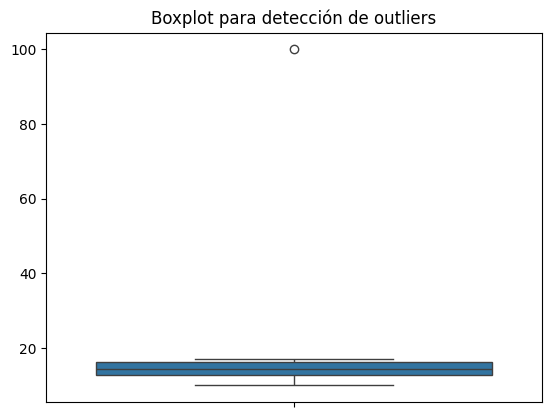

In [7]:
sns.boxplot(data=data)
plt.title("Boxplot para detección de outliers")
plt.show()

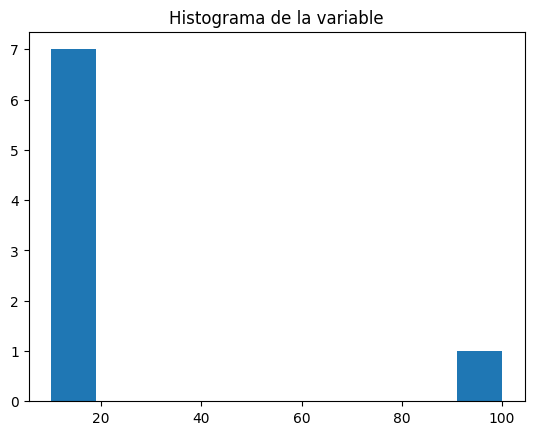

In [8]:
plt.hist(data, bins=10)
plt.title("Histograma de la variable")
plt.show()

## Limpieza de Datos y Estadísticas Iniciales

In [ ]:
# Verificar valores nulos y tipos de datos
df.info()
df.isnull().sum()

## Visualización Inicial de Variables Relevantes

In [ ]:
# Distribución de etiquetas de error
sns.countplot(data=df, x='error_label')
plt.title('Distribución de error_label')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Mapa de calor de correlación
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
# Comparar diferencia de score por tipo de error
sns.boxplot(data=df, x='error_label', y='score_diff')
plt.title('Score Diff por error_label')
plt.xticks(rotation=45)
plt.show()

## Análisis por Apertura

In [ ]:
# Top 10 aperturas con más errores
df['opening'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Aperturas en el Dataset')
plt.xlabel('Cantidad de ocurrencias')
plt.gca().invert_yaxis()
plt.show()

## Distribución de Errores por Fase del Juego

In [ ]:
sns.countplot(data=df, x='move_phase', hue='error_label')
plt.title('Errores por Fase del Juego')
plt.xticks(rotation=0)
plt.legend(title='Error')
plt.show()

## Análisis de Movilidad y Errores

In [ ]:
# Comparar score_diff en posiciones de baja movilidad propia
sns.boxplot(data=df, x='is_low_mobility', y='score_diff')
plt.title('Impacto de Baja Movilidad en Score')
plt.xticks([0,1], ['No', 'Sí'])
plt.show()